In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10#Base de données
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

2025-02-20 18:41:14.473468: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740073274.504964   76354 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740073274.512097   76354 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 18:41:14.541312: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Charger les données CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
# Classes CIFAR-10
cifar10_classes = ["Avion", "Automobile", "Oiseau", "Chat", "Cerf",



                   
                   "Chien", "Grenouille", "Cheval", "Bateau", "Camion"]

# Afficher la forme des ensembles d'entraînement et de test
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)


Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 1)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble de test (étiquettes) : (10000, 1)


In [6]:
# Afficher quelques exemples d'images et leurs étiquettes
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(cifar10_classes[y_train[i][0]])
    plt.axis('off')
plt.show()


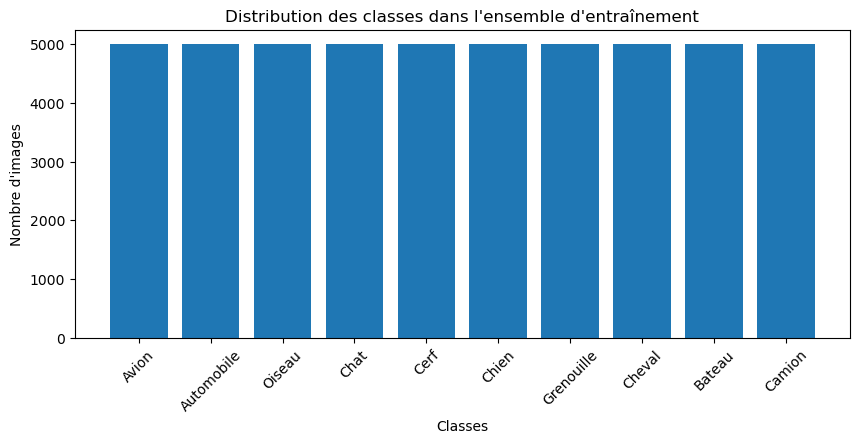

In [7]:
# Afficher la distribution des classes dans l'ensemble d'entraînement
class_distribution = [0] * 10
for label in y_train:
    class_distribution[label[0]] += 1
    
plt.figure(figsize=(10, 4))
plt.bar(cifar10_classes, class_distribution)
plt.title("Distribution des classes dans l'ensemble d'entraînement")
plt.xlabel("Classes")
plt.ylabel("Nombre d'images")
plt.xticks(rotation=45)
plt.show()

In [8]:
# Normaliser les pixels des images en mettant à l'échelle entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [9]:
# Transformer les étiquettes en vecteurs one-hot (encodage catégoriel)
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


In [10]:
# Afficher les dimensions après le prétraitement
print("Forme de l'ensemble d'entraînement (images) :", x_train.shape)
print("Forme de l'ensemble de test (images) :", x_test.shape)
print("Forme de l'ensemble d'entraînement (étiquettes) :", y_train.shape)
print("Forme de l'ensemble de test (étiquettes) :", y_test.shape)

Forme de l'ensemble d'entraînement (images) : (50000, 32, 32, 3)
Forme de l'ensemble de test (images) : (10000, 32, 32, 3)
Forme de l'ensemble d'entraînement (étiquettes) : (50000, 10)
Forme de l'ensemble de test (étiquettes) : (10000, 10)


In [ ]:
model MLP
CONSTRUCTION DE MODELE

In [11]:
# Importer les bibliothèques nécessaires
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers




# Définir le modèle MLP pour la classification d'images
model_mlp = keras.Sequential([
    # Aplatir les images 32x32 en un vecteur 1D 
    layers.Flatten(input_shape=(32, 32, 3)),#3: RVB
    # Ajouter une couche cachée de 128 neurones avec une fonction d'activation ReLU
    layers.Dense(128, activation='relu'),
    # Ajouter la couche de sortie avec 10 neurones (classes CIFAR-10) et une fonction d'activation softmax
    layers.Dense(10, activation='softmax')
])


/home/myalta/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-20 18:43:58.067860: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [12]:


# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_mlp.compile(optimizer='adam', # Utilisation de l'optimiseur Adam
                  loss='categorical_crossentropy', # Fonction de perte pour la classification multiclasse
                  metrics=['accuracy']) # Métrique de précision


In [13]:
# Afficher un résumé du modèle pour obtenir des informations sur les couches et les paramètres
model_mlp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'historique' is not defined

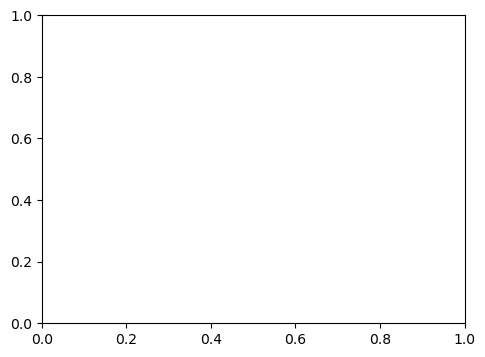

In [14]:
# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(historique.history['loss'], label='Perte d\'entraînement')
plt.plot(historique.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(historique.history['accuracy'], label='Précision d\'entraînement')
plt.plot(historique.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')



In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_mlp.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]


In [ ]:

# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()


In [ ]:
MODELE DE RESEAUX DE NEURONES CONVOLUTIFS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

In [ ]:
# Compiler le modèle avec une fonction de perte, un optimiseur et des métriques
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Entraîner le modèle CNN sur les données d'entraînement
epochs = 10
batch_size = 64

history_cnn = model_cnn.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, shuffle=True)

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)


In [ ]:

# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=2)

# Afficher la précision du modèle sur les données de test
print(f'Précision sur les données de test : {test_accuracy*100:.2f}%')

# Afficher les courbes d'apprentissage (perte et précision)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Perte d\'entraînement')
plt.plot(history_cnn.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de Perte')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history_cnn.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de Précision')

plt.show()

In [ ]:
# Importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Définir les classes
CLASSES = np.array([
    "avion",
    "voiture",
    "oiseau",
    "chat",
    "cerf",
    "chien",
    "grenouille",
    "cheval",
    "bateau",
    "camion",
])

# Prédire les classes pour les données de test
predictions = model_cnn.predict(x_test)
predictions_simples = CLASSES[np.argmax(predictions, axis=-1)]
vraies_classes_simples = CLASSES[np.argmax(y_test, axis=-1)]


In [ ]:

# Nombre d'images à afficher
n_a_afficher = 6
indices = np.random.choice(range(len(x_test)), n_a_afficher)

# Créer une figure pour afficher les images
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Afficher les images avec leurs prédictions et étiquettes réelles
for i, idx in enumerate(indices):
    image = x_test[idx]
    ax = fig.add_subplot(1, n_a_afficher, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "prédiction = " + str(predictions_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "étiquette réelle = " + str(vraies_classes_simples[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(image)
    
# Afficher la figure
plt.show()
